In [124]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# standardizes input features by removing the mean and scaling to unit variance (z-score)
from sklearn.preprocessing import StandardScaler

# split training and test sets
from sklearn.model_selection import train_test_split

# algorithms to use
from sklearn.linear_model import LogisticRegression

# metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score

# scaling input data. This estimator scales and translates each feature individually such that it is in the range between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# importing tensorflow ml framework and models to use
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# importing regularizers to prevent overfitting
from tensorflow.keras import regularizers

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['figure.figsize'] = (40, 28)

In [125]:
# reading in data source as a dataframe and naming the columns. Column names are provided by the data readme file
df = pd.read_csv('breast-cancer-wisconsin.txt', sep=',', names=["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])

In [126]:
# data exploration of first 5 rows
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [127]:
# dropping 'Sample code number' as this categorical column does not contain any meaningful information
df.drop(columns=['Sample code number'], inplace=True)

In [128]:
# according to data documentation, unknown values were marked using '?'. Checking columns to see where instances of '?' are located
columns = df.columns

# output verifies that '?' values are present only in 'Bare Nuclei' column
print("'?' present | Column Name \n")
for col in columns:
    x = '?' in df[col].values
    print(x, " ", col)

'?' present | Column Name 

False   Clump Thickness
False   Uniformity of Cell Size
False   Uniformity of Cell Shape
False   Marginal Adhesion
False   Single Epithelial Cell Size
True   Bare Nuclei
False   Bland Chromatin
False   Normal Nucleoli
False   Mitoses
False   Class


In [129]:
# finding rows in 'Bare Nuclei' column that contain '?'
df[df['Bare Nuclei'] == '?']

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [130]:
# finding number of entries that contain unknown values for 'Bare Nuclei' column
df[df['Bare Nuclei'] == '?'].shape

(16, 10)

In [131]:
# replacing '?' values with 0 in 'Bare Nuclei' column 
df = df.replace('?', 0)

In [132]:
# confirming no values of '?' in any df column
print("'?' present | Column Name \n")
for col in columns:
    x = '?' in df[col].values
    print(x, col)

'?' present | Column Name 

False Clump Thickness
False Uniformity of Cell Size
False Uniformity of Cell Shape
False Marginal Adhesion
False Single Epithelial Cell Size
False Bare Nuclei
False Bland Chromatin
False Normal Nucleoli
False Mitoses
False Class


In [133]:
# looking at column data types. Bare nuclei is set to 'object' data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [134]:
# Setting 'Bare Nuclei' column to integer data type
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [135]:
# calculating statistics for each numerical column. Class is excluded as this column denotes benign vs. malignant tumors
num_cols = df.columns[0:-1]
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.463519,3.640708,0.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [136]:
# setting categorical column for 'Class' column since '2' means benign result, '4' means malignant 
cat_col = df["Class"]

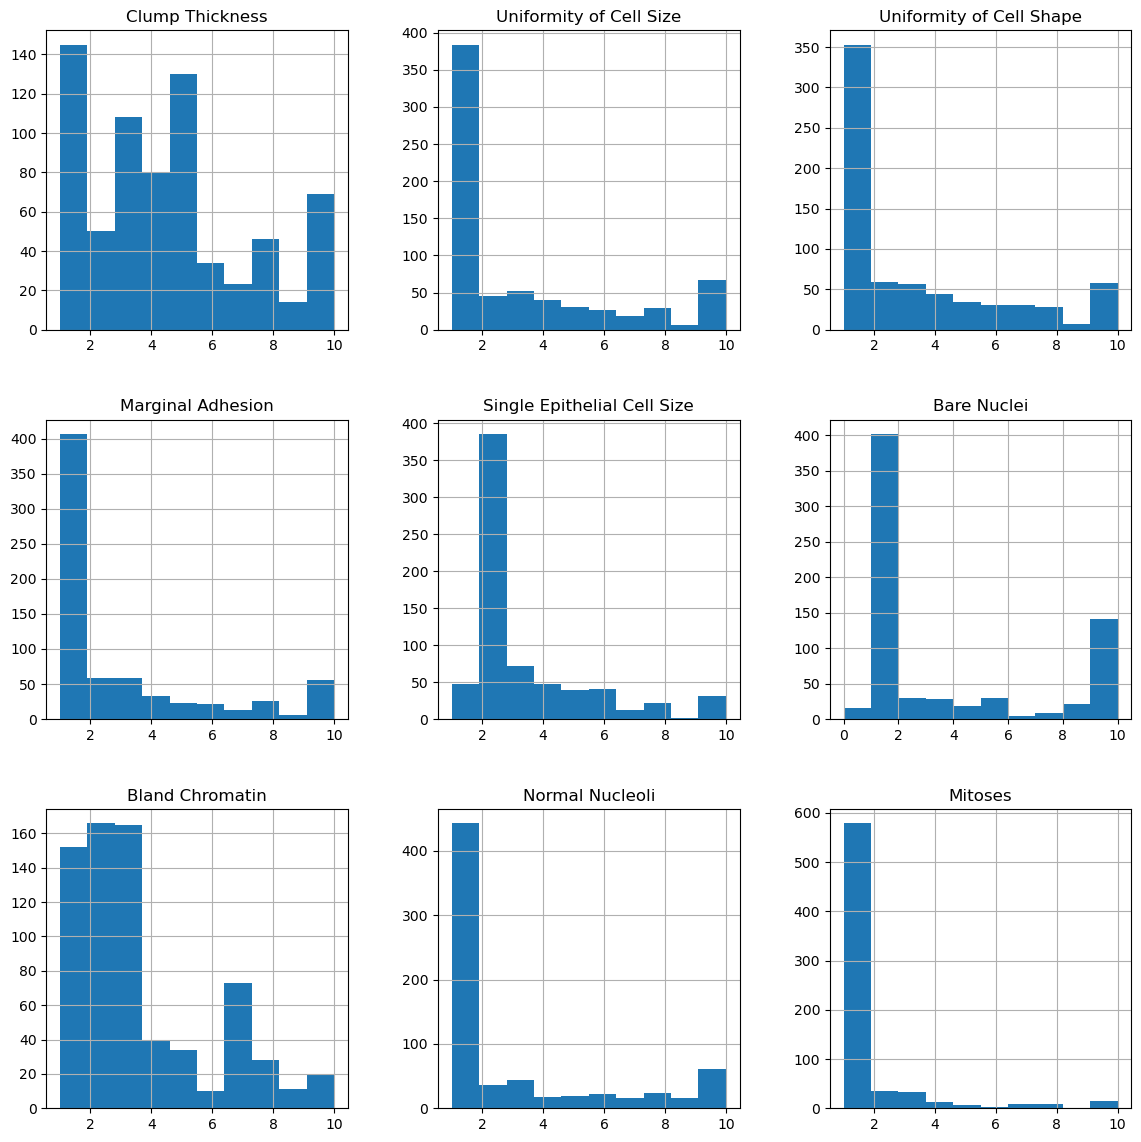

In [137]:
# creating histograms of numerical columns
df[num_cols].hist(figsize=(14,14))
plt.show()

In [138]:
# finding unique values of 'Class' column
df['Class'].unique()

array([2, 4], dtype=int64)

In [139]:
# according to documentation, value of 2 in 'Class' column correspond to benign test results, value of 4 to benign
# replacing values of 2 with 'benign', values of 4 to 'malignant'
df['Class'] = df['Class'].replace(2, 'benign')
df['Class'] = df['Class'].replace(4, 'malignant')

In [140]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign


In [141]:
# calculating distribution of benign vs. malignant 
# ~65% of cases in our data set are benign, ~35% are malignant
df['Class'].value_counts(normalize=True)

benign       0.655222
malignant    0.344778
Name: Class, dtype: float64

In [142]:
# grouping numerical variables
df_comparison = df.groupby('Class')[num_cols].mean()
df_comparison

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
benign,2.956332,1.325328,1.443231,1.364629,2.120087,1.305677,2.100437,1.290393,1.063319
malignant,7.195021,6.572614,6.560166,5.547718,5.298755,7.564315,5.979253,5.863071,2.589212


In [143]:
# computing numerical column differences between benign and malignant cases
difference = df_comparison.diff().iloc[1,:].T
difference

Clump Thickness                4.238689
Uniformity of Cell Size        5.247287
Uniformity of Cell Shape       5.116935
Marginal Adhesion              4.183089
Single Epithelial Cell Size    3.178668
Bare Nuclei                    6.258638
Bland Chromatin                3.878816
Normal Nucleoli                4.572678
Mitoses                        1.525893
Name: malignant, dtype: float64

In [144]:
# adding difference values to df
df_comparison = df_comparison.append(difference)
df_comparison.index = ['benign', 'malignant', 'difference']
df_comparison

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
benign,2.956332,1.325328,1.443231,1.364629,2.120087,1.305677,2.100437,1.290393,1.063319
malignant,7.195021,6.572614,6.560166,5.547718,5.298755,7.564315,5.979253,5.863071,2.589212
difference,4.238689,5.247287,5.116935,4.183089,3.178668,6.258638,3.878816,4.572678,1.525893


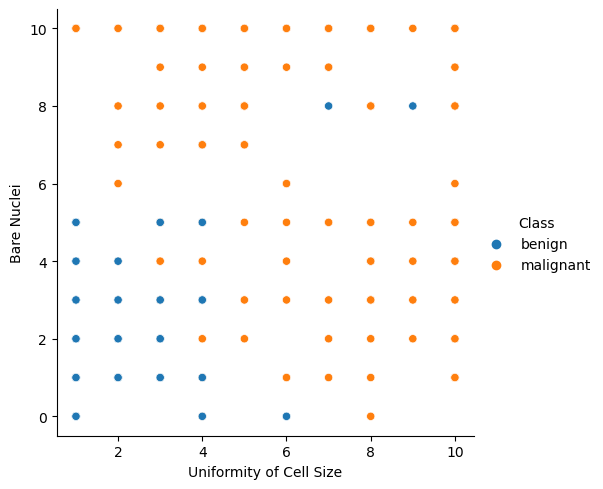

In [145]:
sns.relplot(data=df, x="Uniformity of Cell Size", y="Bare Nuclei", hue="Class")

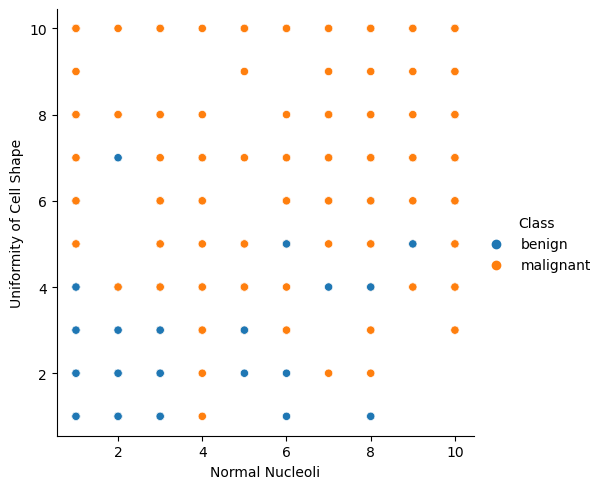

In [146]:
sns.relplot(data=df, x="Normal Nucleoli", y="Uniformity of Cell Shape", hue="Class")

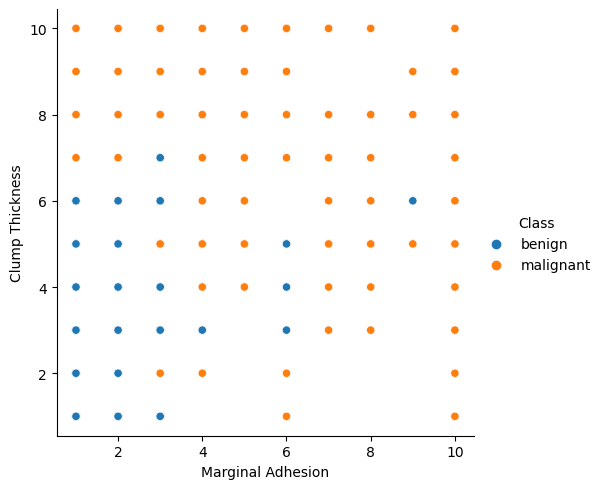

In [147]:
sns.relplot(data=df, x="Marginal Adhesion", y="Clump Thickness", hue="Class")

<AxesSubplot:>

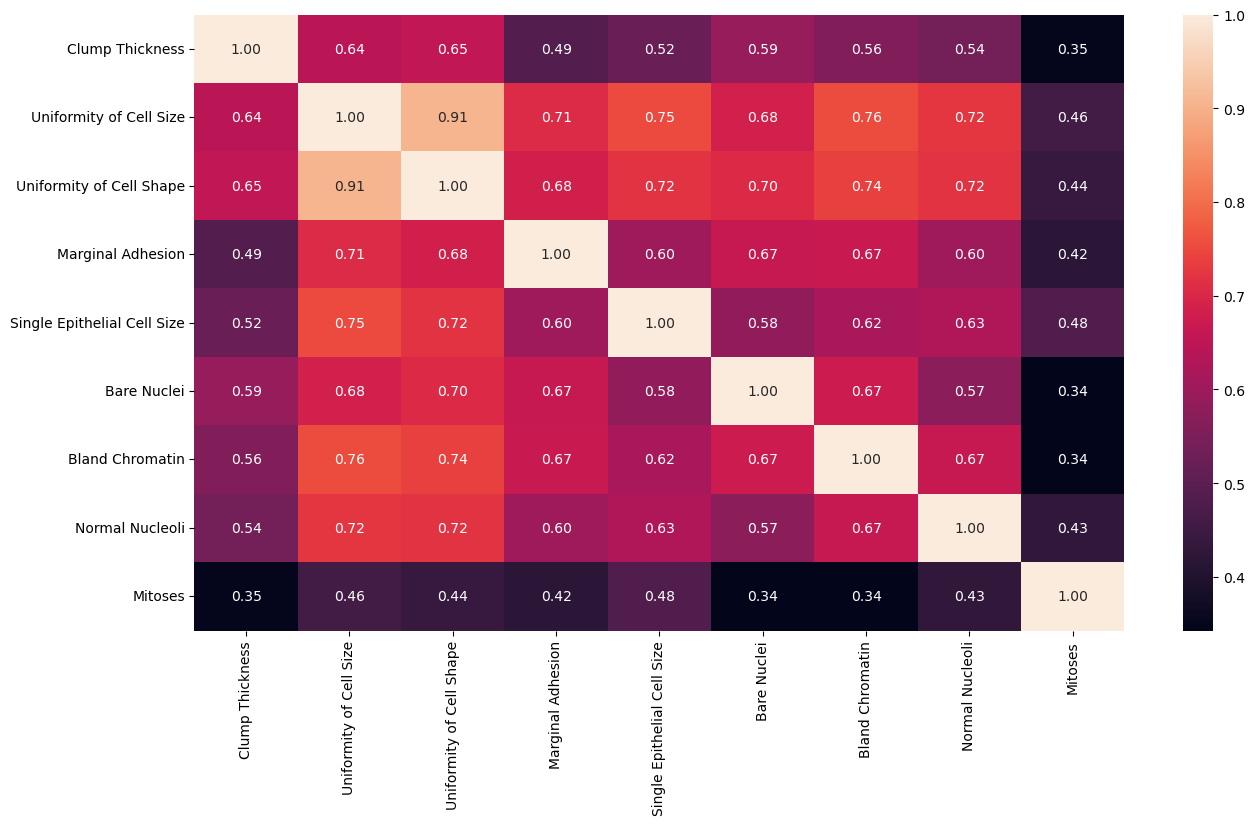

In [82]:
# creating correlation matrix amongst all numerical columns
plt.figure(figsize=(15, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='0.2f')

In [83]:
# setting test results of 'malignant' as event of interest by setting value to 1
# 'benign' test results are set to 0 since these results are not our event of interest
dict_test_result = {'malignant':1, 'benign':0}

df['Class'] = df['Class'].map(dict_test_result)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [84]:
# setting independent variables X as input
X = df.drop(columns='Class')
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [85]:
# setting dependent variable Y ('Class' column) as output
Y = df['Class']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [86]:
# creating an instance of StandardScaler class (sc) in order to standardize our input features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [87]:
# creating our training and test data. Our test set will be 10% of the data set, training set will be 90% of the data set
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.1, random_state=1, stratify=Y)

In [88]:
x_train.shape

(629, 9)

In [89]:
x_test.shape

(70, 9)

In [90]:
y_test.value_counts()

0    46
1    24
Name: Class, dtype: int64

In [91]:
# creating our logistic regression instance and training on the training data set
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [92]:
# creating a metrics score function that will determine how well our logistic regression model performs
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='0.2f', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [93]:
# inputting in our test set data to the logistic regression algorithm to output predictions
y_pred_test = lg.predict(x_test)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.88      0.92      0.90        24

    accuracy                           0.93        70
   macro avg       0.92      0.93      0.92        70
weighted avg       0.93      0.93      0.93        70



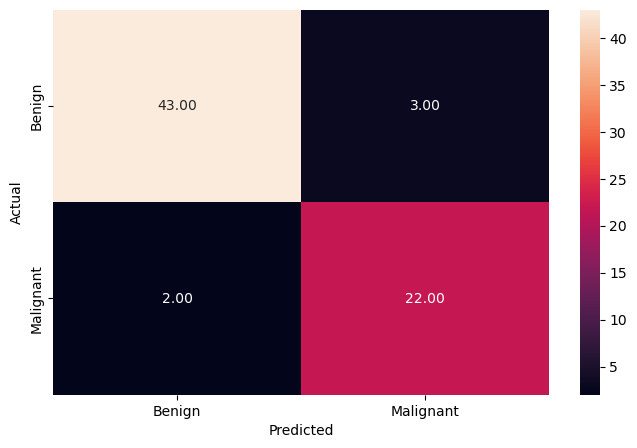

In [94]:
# evaluating how well our logisitic regression performs
metrics_score(y_test, y_pred_test)

In [95]:
accuracy_score(y_test, y_pred_test)

0.9285714285714286

In [96]:
# finding variables with highest feature importance 
cols = X.columns
coef_lg = lg.coef_

pd.DataFrame(coef_lg, columns=cols).T.sort_values(by=0, ascending=False)

,0
Bare Nuclei,1.621090
Clump Thickness,1.426653
Mitoses,0.997988
Bland Chromatin,0.854103
Uniformity of Cell Shape,0.838651
Marginal Adhesion,0.746027
Normal Nucleoli,0.323980
Single Epithelial Cell Size,0.245207
Uniformity of Cell Size,0.236777


In [97]:
# getting probabilities for each class in order to create our precision recall curve
y_scores_lg_test = lg.predict_proba(x_test)

In [98]:
# creating a precision recall curve for our logisitic regression model
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, y_scores_lg_test[:,1])

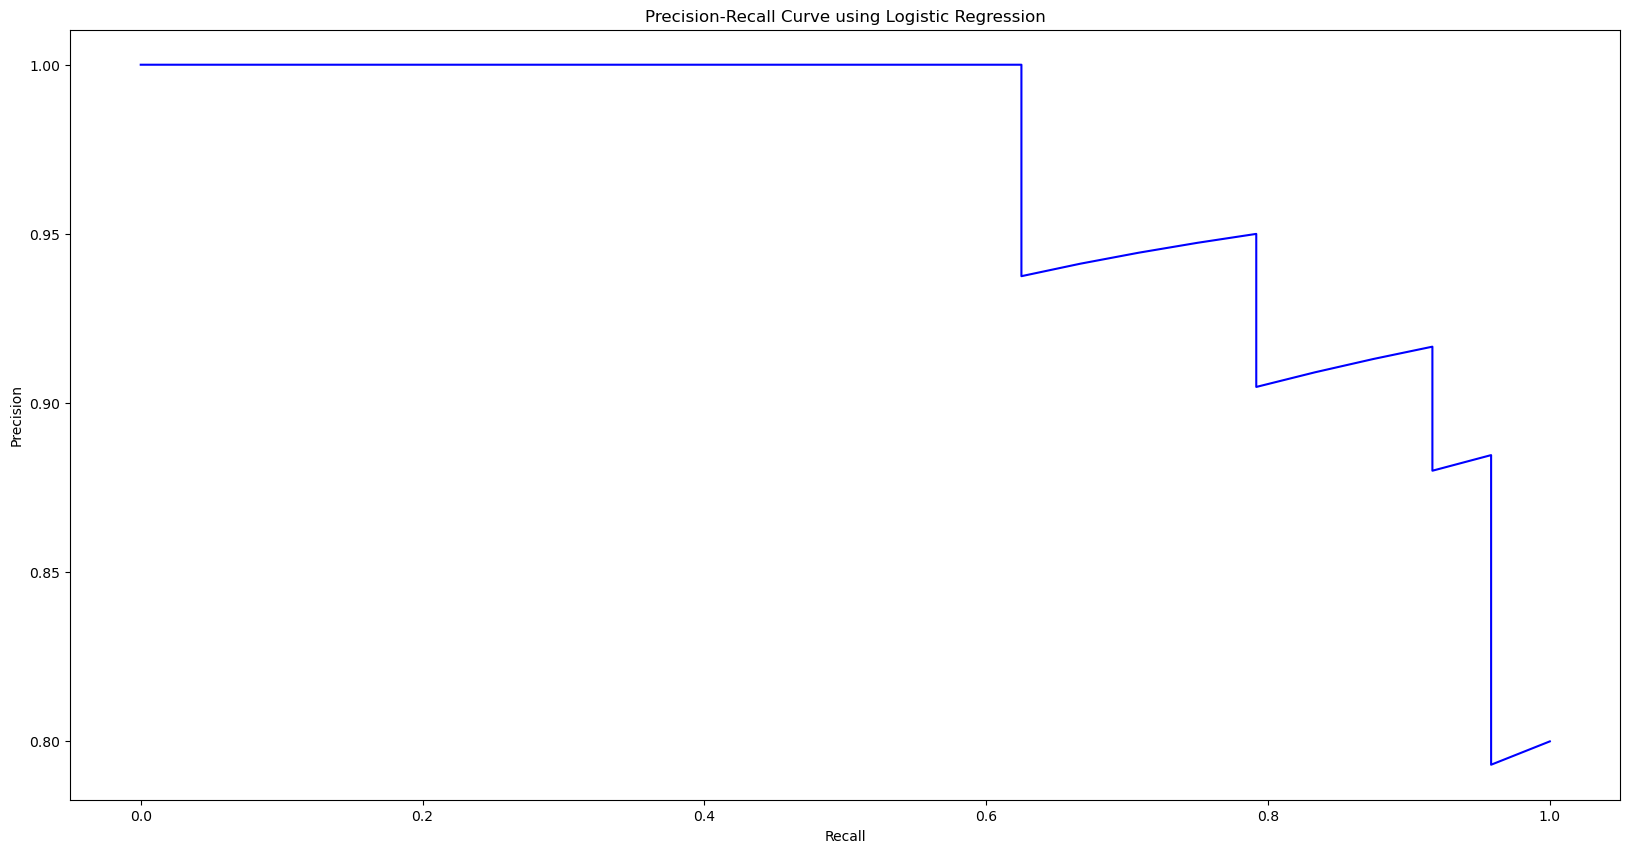

In [99]:
# outputting plot of the precision-recall curve
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(recalls_lg, precisions_lg, color='blue')
ax.set_title('Precision-Recall Curve using Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [100]:
#Fixing the seed for random number generators
import random
random.seed(42)
tf.random.set_seed(42)

In [101]:
# Model 1 - building a feed forward neural network with 1 hidden layers and the output layer.

# we will be adding the layers sequentially
model_1 = Sequential()

# input layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(9,)))

# we will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# we will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# output layer with only one neuron and sigmoid as activation function will give the probabilities for malignant and benign cases
model_1.add(Dense(1, activation='sigmoid'))

In [102]:
# since we have 2 cases (benign or malignant), we will use binary cross entropy as our loss function, adam as optimizer, and use accuracy for metrics
model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1280      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [103]:
# training our neural network model on training data, with 10% as test data
history_1 = model_1.fit(x_train, y_train, validation_split=0.1, epochs=400, verbose=2)

Epoch 1/400
18/18 - 3s - loss: 0.5717 - accuracy: 0.7703 - val_loss: 0.4165 - val_accuracy: 0.9524 - 3s/epoch - 150ms/step
Epoch 2/400
18/18 - 0s - loss: 0.3337 - accuracy: 0.9717 - val_loss: 0.2433 - val_accuracy: 0.9524 - 237ms/epoch - 13ms/step
Epoch 3/400
18/18 - 0s - loss: 0.1882 - accuracy: 0.9682 - val_loss: 0.1515 - val_accuracy: 0.9683 - 173ms/epoch - 10ms/step
Epoch 4/400
18/18 - 0s - loss: 0.1197 - accuracy: 0.9700 - val_loss: 0.1148 - val_accuracy: 0.9683 - 280ms/epoch - 16ms/step
Epoch 5/400
18/18 - 0s - loss: 0.1024 - accuracy: 0.9700 - val_loss: 0.0983 - val_accuracy: 0.9683 - 109ms/epoch - 6ms/step
Epoch 6/400
18/18 - 0s - loss: 0.0893 - accuracy: 0.9700 - val_loss: 0.0891 - val_accuracy: 0.9683 - 120ms/epoch - 7ms/step
Epoch 7/400
18/18 - 0s - loss: 0.0832 - accuracy: 0.9700 - val_loss: 0.0846 - val_accuracy: 0.9683 - 110ms/epoch - 6ms/step
Epoch 8/400
18/18 - 0s - loss: 0.0742 - accuracy: 0.9700 - val_loss: 0.0807 - val_accuracy: 0.9683 - 226ms/epoch - 13ms/step
Epoch

Epoch 67/400
18/18 - 0s - loss: 0.0405 - accuracy: 0.9859 - val_loss: 0.0705 - val_accuracy: 0.9365 - 157ms/epoch - 9ms/step
Epoch 68/400
18/18 - 0s - loss: 0.0401 - accuracy: 0.9859 - val_loss: 0.0708 - val_accuracy: 0.9365 - 182ms/epoch - 10ms/step
Epoch 69/400
18/18 - 0s - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0711 - val_accuracy: 0.9365 - 171ms/epoch - 9ms/step
Epoch 70/400
18/18 - 0s - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0716 - val_accuracy: 0.9365 - 121ms/epoch - 7ms/step
Epoch 71/400
18/18 - 0s - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0719 - val_accuracy: 0.9365 - 120ms/epoch - 7ms/step
Epoch 72/400
18/18 - 0s - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0723 - val_accuracy: 0.9365 - 205ms/epoch - 11ms/step
Epoch 73/400
18/18 - 0s - loss: 0.0373 - accuracy: 0.9859 - val_loss: 0.0729 - val_accuracy: 0.9365 - 149ms/epoch - 8ms/step
Epoch 74/400
18/18 - 0s - loss: 0.0369 - accuracy: 0.9876 - val_loss: 0.0731 - val_accuracy: 0.9365 - 117ms/epoch - 7ms/ste

18/18 - 0s - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.0979 - val_accuracy: 0.9365 - 113ms/epoch - 6ms/step
Epoch 133/400
18/18 - 0s - loss: 0.0189 - accuracy: 0.9929 - val_loss: 0.0980 - val_accuracy: 0.9365 - 109ms/epoch - 6ms/step
Epoch 134/400
18/18 - 0s - loss: 0.0199 - accuracy: 0.9929 - val_loss: 0.0981 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 135/400
18/18 - 0s - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0978 - val_accuracy: 0.9365 - 156ms/epoch - 9ms/step
Epoch 136/400
18/18 - 0s - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.0983 - val_accuracy: 0.9365 - 294ms/epoch - 16ms/step
Epoch 137/400
18/18 - 0s - loss: 0.0217 - accuracy: 0.9912 - val_loss: 0.0992 - val_accuracy: 0.9365 - 133ms/epoch - 7ms/step
Epoch 138/400
18/18 - 0s - loss: 0.0188 - accuracy: 0.9929 - val_loss: 0.0995 - val_accuracy: 0.9365 - 202ms/epoch - 11ms/step
Epoch 139/400
18/18 - 0s - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.1000 - val_accuracy: 0.9365 - 204ms/epoch - 11ms/step
Epoc

Epoch 198/400
18/18 - 0s - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.1259 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 199/400
18/18 - 0s - loss: 0.0125 - accuracy: 0.9947 - val_loss: 0.1263 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 200/400
18/18 - 0s - loss: 0.0130 - accuracy: 0.9947 - val_loss: 0.1260 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 201/400
18/18 - 0s - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.1258 - val_accuracy: 0.9365 - 105ms/epoch - 6ms/step
Epoch 202/400
18/18 - 0s - loss: 0.0115 - accuracy: 0.9982 - val_loss: 0.1261 - val_accuracy: 0.9365 - 95ms/epoch - 5ms/step
Epoch 203/400
18/18 - 0s - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.1273 - val_accuracy: 0.9365 - 109ms/epoch - 6ms/step
Epoch 204/400
18/18 - 0s - loss: 0.0099 - accuracy: 0.9982 - val_loss: 0.1266 - val_accuracy: 0.9365 - 97ms/epoch - 5ms/step
Epoch 205/400
18/18 - 0s - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.1268 - val_accuracy: 0.9365 - 109ms/epoch - 6ms/st

Epoch 264/400
18/18 - 0s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.1473 - val_accuracy: 0.9524 - 109ms/epoch - 6ms/step
Epoch 265/400
18/18 - 0s - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.1470 - val_accuracy: 0.9524 - 141ms/epoch - 8ms/step
Epoch 266/400
18/18 - 0s - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.1475 - val_accuracy: 0.9524 - 122ms/epoch - 7ms/step
Epoch 267/400
18/18 - 0s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1482 - val_accuracy: 0.9524 - 124ms/epoch - 7ms/step
Epoch 268/400
18/18 - 0s - loss: 0.0068 - accuracy: 0.9965 - val_loss: 0.1493 - val_accuracy: 0.9524 - 109ms/epoch - 6ms/step
Epoch 269/400
18/18 - 0s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1506 - val_accuracy: 0.9524 - 109ms/epoch - 6ms/step
Epoch 270/400
18/18 - 0s - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.1506 - val_accuracy: 0.9524 - 111ms/epoch - 6ms/step
Epoch 271/400
18/18 - 0s - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.1517 - val_accuracy: 0.9524 - 104ms/epoch - 6

Epoch 330/400
18/18 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 331/400
18/18 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1900 - val_accuracy: 0.9365 - 109ms/epoch - 6ms/step
Epoch 332/400
18/18 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 0.9365 - 109ms/epoch - 6ms/step
Epoch 333/400
18/18 - 0s - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.1947 - val_accuracy: 0.9365 - 96ms/epoch - 5ms/step
Epoch 334/400
18/18 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1955 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 335/400
18/18 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1951 - val_accuracy: 0.9365 - 109ms/epoch - 6ms/step
Epoch 336/400
18/18 - 0s - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.1957 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 337/400
18/18 - 0s - loss: 0.0055 - accuracy: 0.9965 - val_loss: 0.1955 - val_accuracy: 0.9365 - 110ms/epoch - 6ms/s

Epoch 396/400
18/18 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2260 - val_accuracy: 0.9365 - 93ms/epoch - 5ms/step
Epoch 397/400
18/18 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 398/400
18/18 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2254 - val_accuracy: 0.9365 - 111ms/epoch - 6ms/step
Epoch 399/400
18/18 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2266 - val_accuracy: 0.9365 - 94ms/epoch - 5ms/step
Epoch 400/400
18/18 - 0s - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.2230 - val_accuracy: 0.9365 - 109ms/epoch - 6ms/step


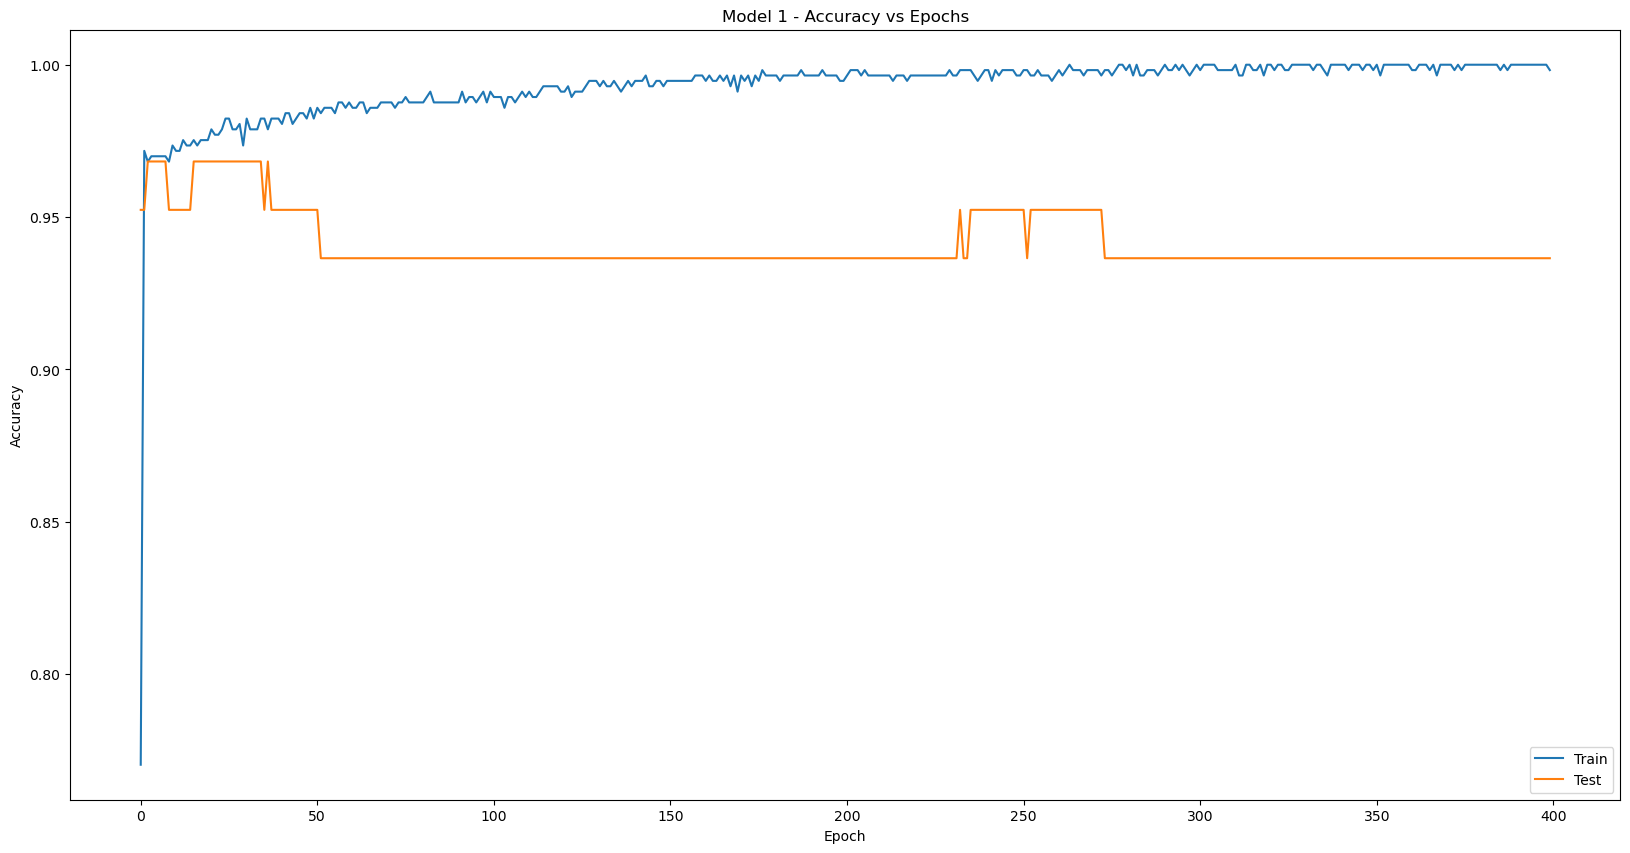

In [104]:
# plotting accuracy vs epoch for neural network model 1
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 - Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [105]:
# getting neural network model 1 loss and accuracy values 
model_1.evaluate(x_test, y_test, verbose = 1)

3/3 [==============================] - 0s 8ms/step - loss: 0.6038 - accuracy: 0.9286


[0.6038088798522949, 0.9285714030265808]

In [106]:
# creating a precision recall curve for our neural network model 
y_scores_nn_1 = model_1.predict(x_test)
precisions_nn_1, recalls_nn_1, thresholds_nn_1 = precision_recall_curve(y_test, y_scores_nn_1[:])

3/3 [==============================] - 0s 0s/step


In [107]:
# creating a break even function using precision and recall curves as inputs
def breakEven(precision_curve,recall_curve):
    difference = precision_curve - recall_curve
    difference_index = np.argwhere(difference == 0)
    breakeven = precision_curve[int(difference_index)]
    return breakeven

In [108]:
# calculating break even point for our logisitic regression model
breakEven_lg = breakEven(precisions_lg, recalls_lg)
breakEven_lg

0.9166666666666666

In [109]:
# calculating break even point for our neural network model 1
breakEven_nn_1 = breakEven(precisions_nn_1, recalls_nn_1)
breakEven_nn_1

0.875

In [110]:
# clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [111]:
# fixing the seed for random number generators
import random
random.seed(42)
tf.random.set_seed(42)

In [112]:
# Model 2 - building a feed forward neural network with 3 hidden layers and the output layer, with regularizer.

# we will be adding the layers sequentially
model_2 = Sequential()

# input layer with 256 neurons and relu activation function, the input shape tuple denotes number of independent variables, and using regularizer to prevent overfitting
model_2.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-1), input_shape=(9,)))

# we will be switching 80% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.8))

# hidden layer with 128 neurons and relu activation function, and regularizer
model_2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-1)))

# we will be switching 60% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.6))

# hidden layer with 64 neurons and relu activation function, and regularizer
model_2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-1)))

# we will be switching 60% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.6))

# hidden layer with 32 neurons and relu activation function, and regularizer
model_2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-1)))

# output layer with only one neuron and sigmoid as activation function will give the probabilities for malignant and benign cases
model_2.add(Dense(1, activation='sigmoid'))

In [113]:
# since we have 2 cases (benign or malignant), we will use binary cross entropy as our loss function, adam as optimizer, and use accuracy for metrics
model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [114]:
# training our neural network model on training data, with 10% as test data
history_2 = model_2.fit(x_train, y_train, validation_split=0.1, epochs=400)

Epoch 1/400
18/18 [==============================] - 2s 26ms/step - loss: 27.4754 - accuracy: 0.6113 - val_loss: 22.5375 - val_accuracy: 0.8413
Epoch 2/400
18/18 [==============================] - 0s 8ms/step - loss: 19.0889 - accuracy: 0.7473 - val_loss: 15.5270 - val_accuracy: 0.6349
Epoch 3/400
18/18 [==============================] - 0s 9ms/step - loss: 13.0996 - accuracy: 0.7138 - val_loss: 10.6404 - val_accuracy: 0.5556
Epoch 4/400
18/18 [==============================] - 0s 8ms/step - loss: 8.9650 - accuracy: 0.6979 - val_loss: 7.3315 - val_accuracy: 0.5556
Epoch 5/400
18/18 [==============================] - 0s 9ms/step - loss: 6.1856 - accuracy: 0.6678 - val_loss: 5.1144 - val_accuracy: 0.5556
Epoch 6/400
18/18 [==============================] - 0s 8ms/step - loss: 4.3387 - accuracy: 0.6731 - val_loss: 3.6377 - val_accuracy: 0.5556
Epoch 7/400
18/18 [==============================] - 0s 8ms/step - loss: 3.1097 - accuracy: 0.6678 - val_loss: 2.6658 - val_accuracy: 0.5556
Epoch 

18/18 [==============================] - 0s 8ms/step - loss: 0.3948 - accuracy: 0.9523 - val_loss: 0.3817 - val_accuracy: 0.9683
Epoch 59/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3936 - accuracy: 0.9629 - val_loss: 0.3877 - val_accuracy: 0.9365
Epoch 60/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3981 - accuracy: 0.9594 - val_loss: 0.3734 - val_accuracy: 0.9683
Epoch 61/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3986 - accuracy: 0.9611 - val_loss: 0.3715 - val_accuracy: 0.9524
Epoch 62/400
18/18 [==============================] - 0s 8ms/step - loss: 0.4025 - accuracy: 0.9523 - val_loss: 0.3736 - val_accuracy: 0.9683
Epoch 63/400
18/18 [==============================] - 0s 8ms/step - loss: 0.4041 - accuracy: 0.9470 - val_loss: 0.3716 - val_accuracy: 0.9683
Epoch 64/400
18/18 [==============================] - 0s 8ms/step - loss: 0.4017 - accuracy: 0.9523 - val_loss: 0.3677 - val_accuracy: 0.9683
Epoch 65/400
18/18 

18/18 [==============================] - 0s 8ms/step - loss: 0.3701 - accuracy: 0.9576 - val_loss: 0.3606 - val_accuracy: 0.9524
Epoch 116/400
18/18 [==============================] - 0s 7ms/step - loss: 0.3581 - accuracy: 0.9629 - val_loss: 0.3407 - val_accuracy: 0.9683
Epoch 117/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3719 - accuracy: 0.9505 - val_loss: 0.3423 - val_accuracy: 0.9683
Epoch 118/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3733 - accuracy: 0.9541 - val_loss: 0.3419 - val_accuracy: 0.9683
Epoch 119/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3672 - accuracy: 0.9682 - val_loss: 0.3410 - val_accuracy: 0.9683
Epoch 120/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3520 - accuracy: 0.9594 - val_loss: 0.3375 - val_accuracy: 0.9524
Epoch 121/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3615 - accuracy: 0.9541 - val_loss: 0.3398 - val_accuracy: 0.9683
Epoch 122/400

18/18 [==============================] - 0s 8ms/step - loss: 0.3687 - accuracy: 0.9470 - val_loss: 0.3244 - val_accuracy: 0.9524
Epoch 173/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3478 - accuracy: 0.9541 - val_loss: 0.3324 - val_accuracy: 0.9683
Epoch 174/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3315 - accuracy: 0.9611 - val_loss: 0.3279 - val_accuracy: 0.9683
Epoch 175/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3677 - accuracy: 0.9505 - val_loss: 0.3216 - val_accuracy: 0.9683
Epoch 176/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3486 - accuracy: 0.9452 - val_loss: 0.3200 - val_accuracy: 0.9683
Epoch 177/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3544 - accuracy: 0.9488 - val_loss: 0.3239 - val_accuracy: 0.9683
Epoch 178/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3462 - accuracy: 0.9594 - val_loss: 0.3208 - val_accuracy: 0.9683
Epoch 179/400

18/18 [==============================] - 0s 8ms/step - loss: 0.3451 - accuracy: 0.9594 - val_loss: 0.3097 - val_accuracy: 0.9683
Epoch 230/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3213 - accuracy: 0.9682 - val_loss: 0.3049 - val_accuracy: 0.9524
Epoch 231/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3339 - accuracy: 0.9629 - val_loss: 0.3070 - val_accuracy: 0.9683
Epoch 232/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3193 - accuracy: 0.9629 - val_loss: 0.3057 - val_accuracy: 0.9524
Epoch 233/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3355 - accuracy: 0.9558 - val_loss: 0.3077 - val_accuracy: 0.9683
Epoch 234/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3354 - accuracy: 0.9576 - val_loss: 0.3083 - val_accuracy: 0.9683
Epoch 235/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3372 - accuracy: 0.9541 - val_loss: 0.3078 - val_accuracy: 0.9683
Epoch 236/400

18/18 [==============================] - 0s 9ms/step - loss: 0.3268 - accuracy: 0.9594 - val_loss: 0.2990 - val_accuracy: 0.9683
Epoch 287/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3344 - accuracy: 0.9647 - val_loss: 0.2952 - val_accuracy: 0.9683
Epoch 288/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3372 - accuracy: 0.9470 - val_loss: 0.3030 - val_accuracy: 0.9683
Epoch 289/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3332 - accuracy: 0.9558 - val_loss: 0.3068 - val_accuracy: 0.9524
Epoch 290/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3162 - accuracy: 0.9700 - val_loss: 0.2915 - val_accuracy: 0.9524
Epoch 291/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3014 - accuracy: 0.9629 - val_loss: 0.3056 - val_accuracy: 0.9683
Epoch 292/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3166 - accuracy: 0.9541 - val_loss: 0.2952 - val_accuracy: 0.9683
Epoch 293/400

18/18 [==============================] - 0s 8ms/step - loss: 0.3267 - accuracy: 0.9594 - val_loss: 0.3029 - val_accuracy: 0.9683
Epoch 344/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3126 - accuracy: 0.9629 - val_loss: 0.2864 - val_accuracy: 0.9683
Epoch 345/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3192 - accuracy: 0.9594 - val_loss: 0.2853 - val_accuracy: 0.9683
Epoch 346/400
18/18 [==============================] - 0s 8ms/step - loss: 0.2990 - accuracy: 0.9682 - val_loss: 0.2887 - val_accuracy: 0.9683
Epoch 347/400
18/18 [==============================] - 0s 9ms/step - loss: 0.3011 - accuracy: 0.9629 - val_loss: 0.2832 - val_accuracy: 0.9683
Epoch 348/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3246 - accuracy: 0.9611 - val_loss: 0.2840 - val_accuracy: 0.9683
Epoch 349/400
18/18 [==============================] - 0s 8ms/step - loss: 0.3297 - accuracy: 0.9523 - val_loss: 0.2894 - val_accuracy: 0.9683
Epoch 350/400

18/18 [==============================] - 0s 9ms/step - loss: 0.3078 - accuracy: 0.9558 - val_loss: 0.2772 - val_accuracy: 0.9683


In [115]:
# getting neural network model 2 loss and accuracy values 
model_2.evaluate(x_test, y_test, verbose = 1)

3/3 [==============================] - 0s 8ms/step - loss: 0.3528 - accuracy: 0.9429


[0.35282212495803833, 0.9428571462631226]

In [116]:
# creating a precision recall curve for our neural network model 
y_scores_nn_model_2 = model_2.predict(x_test)
precisions_nn_model_2, recalls_nn_model_2, thresholds_nn_model_2 = precision_recall_curve(y_test, y_scores_nn_model_2[:])

3/3 [==============================] - 0s 8ms/step


In [117]:
# calculating break even point for our neural network model 2
model_2_breakeven = breakEven(precisions_nn_model_2, recalls_nn_model_2)
model_2_breakeven

0.9166666666666666

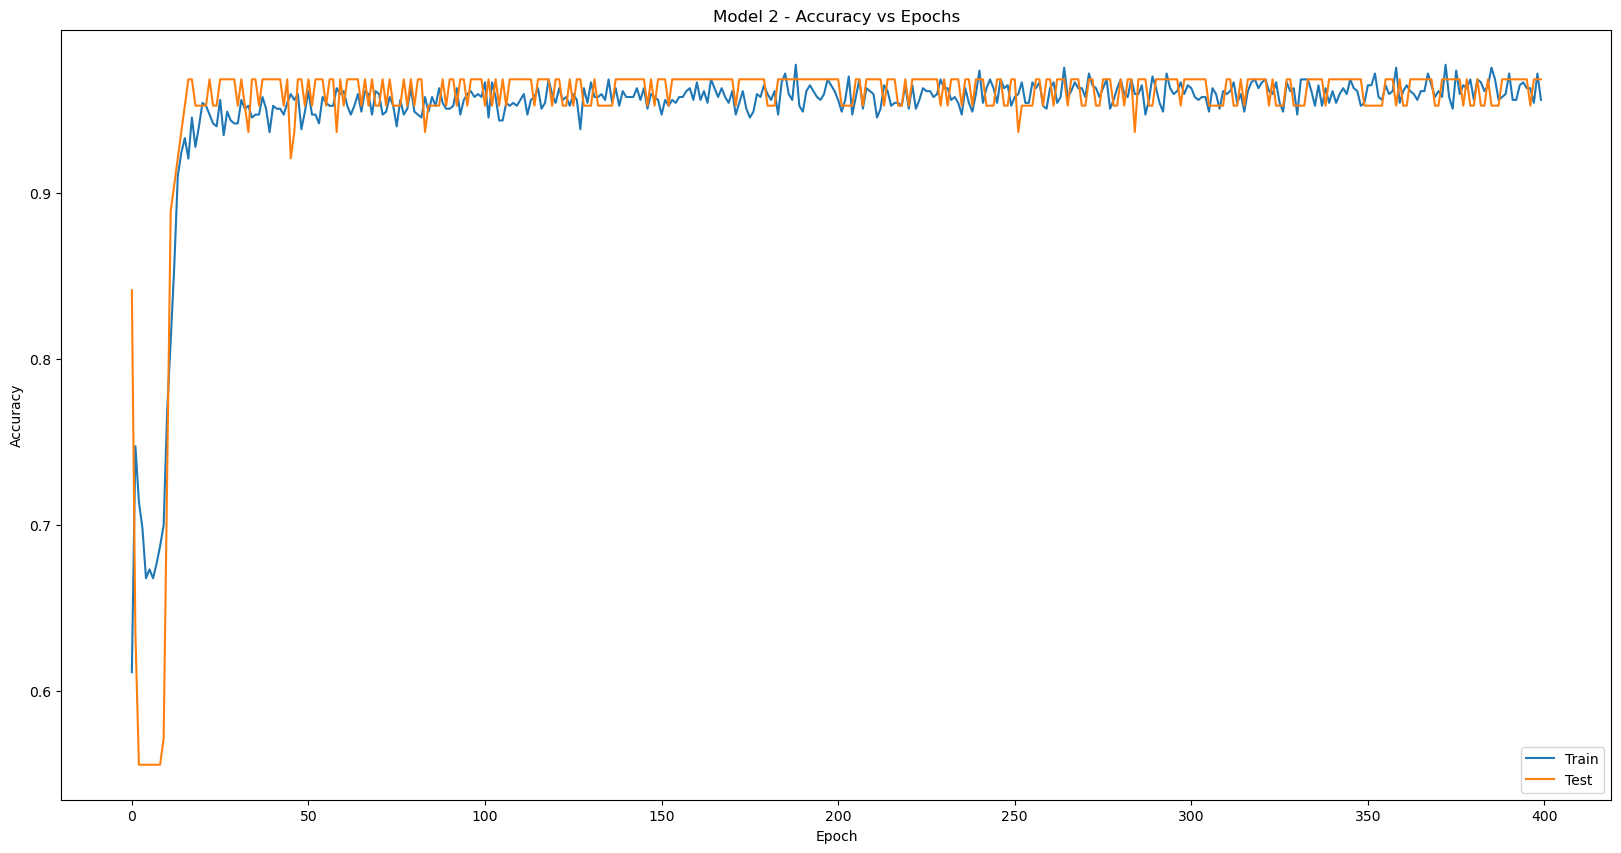

In [118]:
# plotting accuracy vs epoch for neural network model 2
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 - Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

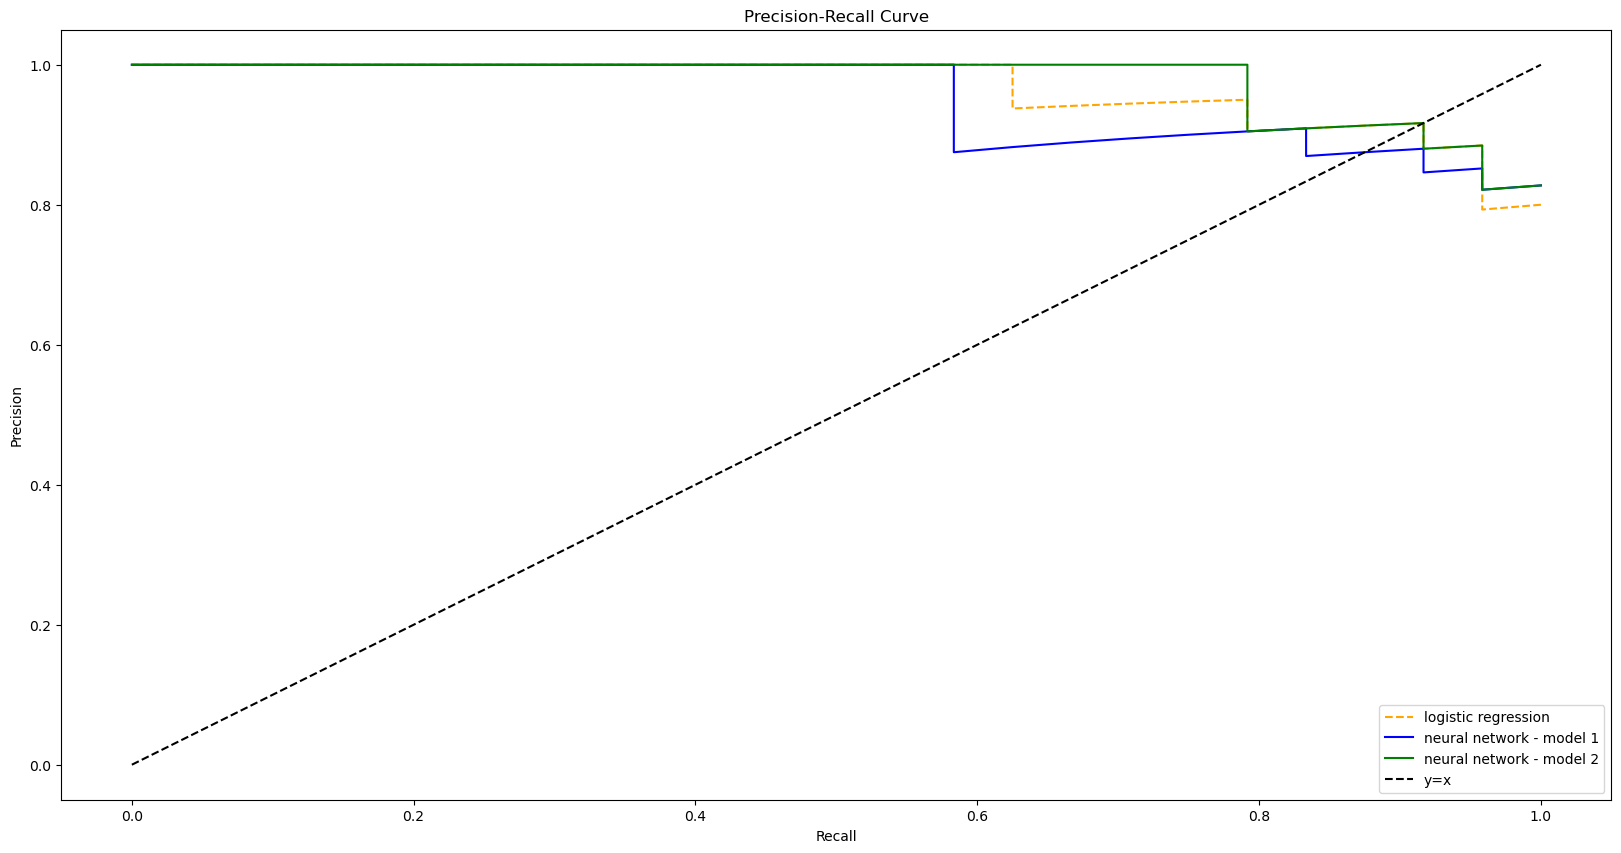

In [119]:
# plotting and comparing break even points across all models
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

x = np.linspace(0,1,100)

ax.plot(recalls_lg, precisions_lg, linestyle='--', color='orange', label='logistic regression')
ax.plot(recalls_nn_1, precisions_nn_1, color='blue', label='neural network - model 1')
ax.plot(recalls_nn_model_2, precisions_nn_model_2, color='green', label='neural network - model 2')
ax.plot(x, x, color='black', linestyle='--', label='y=x')
ax.legend(loc='best')

plt.show()